----
# DKRZ tutorial
----
# Animation of geospatial data
----
In this notebook we show how easy it is to create a video with Matplotlib and FFMpeg. We again take the dataset rectilinear_grid_2D.nc and want to show the deployment of the temperature data over time.

Two slightly different versions are presented, which differ significantly in runtime. 

In case of problems with FFMpeg it is advisable to install the latest version and set the ffmpeg_path via plt.rcParams to animation.ffmpeg_path as already used here.

**Content**

- Create the animation as usual
- Create the animation 8x faster

<br>

2022 copyright DKRZ, kmf

----

In [1]:
import time, os
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import cartopy.crs as ccrs

from IPython.display import Video

----

### Set the path of the ffmpeg binary

You have to modify the path to your ffmpeg binary.

In [2]:
ffmpeg_path = os.environ['HOME']+'/miniconda3/envs/cartopy/bin/ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = ffmpeg_path

----

# Create the animation as usual

### Open data set

In [3]:
infile = '../../data/rectilinear_grid_2D.nc'

ds = xr.open_dataset(infile)

lon = ds.lon
lat = ds.lat
var = ds.tsurf

### Set plotting parameters

In [4]:
plot_parameter = {}
plot_parameter['extent'] = [-180, 180, -90, 90]
plot_parameter['projection'] = ccrs.PlateCarree()
plot_parameter['vmin'] = 240.
plot_parameter['vmax'] = 300.
plot_parameter['cmap'] = 'RdBu_r'
plot_parameter['title'] = 'surface temperature'

### Get number of frames

In [5]:
frames = ds.time.size

### Get date strings

In [6]:
time_str = ds.time.dt.strftime('%Y-%m-%d').data
#print(time_str)

### Define function plot_init() 

In the init() function some plot and axis settings are executed.

In [7]:
def plot_init():
    ax.set_extent(plot_parameter['extent'])
    ax.coastlines()
    plt.title(plot_parameter['title'], fontsize=20)
    return plot

### Define function update_frame()

In the update_frame() function the plots with the text annotations are created.

In [8]:
def update_frame(frame):
    plot = ax.pcolormesh(lon, lat, var[frame,:,:], 
                     cmap=plot_parameter['cmap'], 
                     vmin=plot_parameter['vmin'], 
                     vmax=plot_parameter['vmax'])
    tx.set_text(time_str[frame])
    return plot, tx

### Create the animation

Create the animation and save it as mpeg4 file.

run time: 24.209393978118896


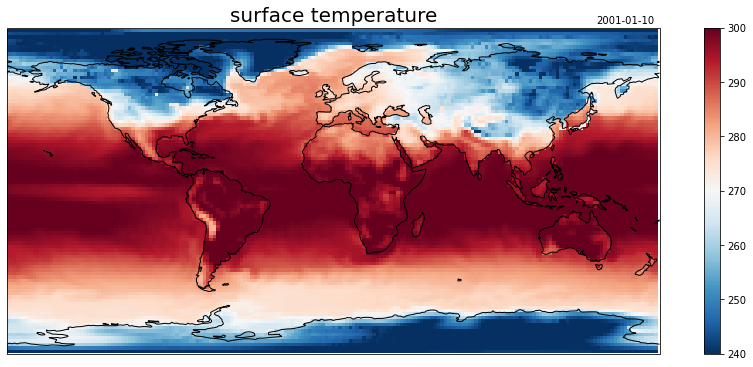

In [9]:
t1 = time.time()

fig, ax = plt.subplots(figsize=(16,6), 
                       subplot_kw={"projection": plot_parameter['projection']})

plot = ax.pcolormesh(lon, lat, var[0,:,:], 
                     cmap=plot_parameter['cmap'], 
                     vmin=plot_parameter['vmin'], 
                     vmax=plot_parameter['vmax'])
cb = plt.colorbar(plot)
tx = fig.text(0.69, 0.89, time_str[0])

ani = FuncAnimation(fig, update_frame, frames=range(0, frames),
                     init_func=plot_init)

ani.save('tsurf_animation.mp4', 
         writer=animation.FFMpegWriter(fps=60, bitrate=5000, codec='h264'),
         dpi=100)

t2 = time.time()
print('run time: '+str(t2-t1))

### Check the mpeg4 file

Load the file to the notebook and show the mpeg4 video.

In [14]:
Video('tsurf_animation.mp4')

----

# Create the animation 8x faster

### Define function update_frame2()

Instead of creating a new plot for each timestep, we only exchange the data for the plot in the update_frame function with plot.set_array(). This is much faster.

In [11]:
def update_frame2(frame):
    plot.set_array(np.array(var[frame,:,:]).ravel())
    tx.set_text(time_str[frame])
    return plot, tx

### Create the animation

Create the animation and save it as mpeg4 file.

run time: 3.058706760406494


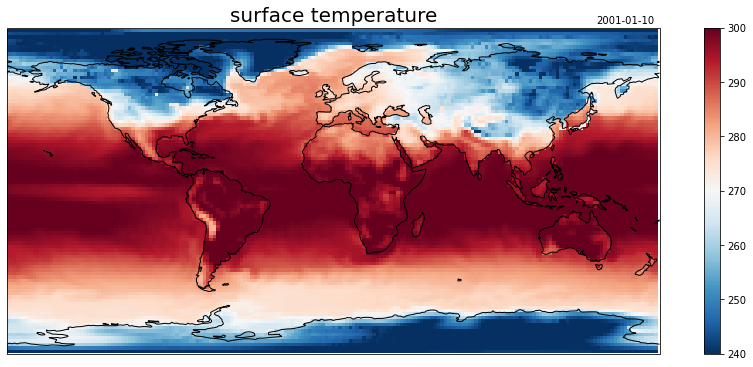

In [12]:
t1 = time.time()

fig, ax = plt.subplots(figsize=(16,6), 
                       subplot_kw={"projection": plot_parameter['projection']})

plot = ax.pcolormesh(lon, lat, var[0,:,:], 
                     cmap=plot_parameter['cmap'], 
                     vmin=plot_parameter['vmin'], 
                     vmax=plot_parameter['vmax'])
cb = plt.colorbar(plot)
tx = fig.text(0.69, 0.89, time_str[0])

ani = FuncAnimation(fig, update_frame2, frames=range(0, frames),
                     init_func=plot_init)

ani.save('tsurf_animation.mp4', 
         writer=animation.FFMpegWriter(fps=60, bitrate=5000, codec='h264'), 
         dpi=100)

t2 = time.time()
print('run time: '+str(t2-t1))

### Check the mpeg4 file

Load the file to the notebook and show the mpeg4 video.

In [15]:
Video('tsurf_animation.mp4')